In [1]:
import pandas as pd
import numpy as np
import multiprocessing as mp
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [4]:
df = df.drop(columns=['id'])

In [5]:
df.iloc[:,df.columns== 'target'] = df.iloc[:,df.columns== 'target'].applymap(lambda x:int(x[-1]))

In [6]:
X = df.iloc[:,df.columns!= 'target']
y = df.iloc[:,df.columns== 'target']

In [7]:
# data_dmatrix = xgb.DMatrix(data=X,label=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [9]:
le = LabelEncoder()
y_train = le.fit_transform(y_train.values.ravel())

In [10]:
xgboost = XGBClassifier()

In [11]:
time_l = []
for i in (1,2,4,8):
    params = {  'colsample_bytree':0.3,
              'max_depth': 4,
              'alpha': 10,
              'learning_rate': 1.0,
              'n_estimators':100,
              'n_jobs':i
              }
    xgb_clf = XGBClassifier(**params)
    t1 = time.time()
    xgb_clf.fit(X_train, y_train)
    t2 = time.time()-t1
    time_l.append(t2)
time_l

[21.996780157089233, 11.669294118881226, 6.639618396759033, 4.840360164642334]

In [12]:
y_pred = xgb_clf.predict(X_test)

In [13]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test-1, y_pred)))

XGBoost model accuracy score: 0.8016


Text(0, 0.5, 'Elapsed Time')

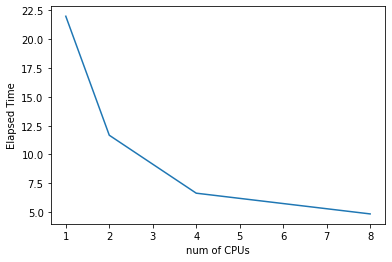

In [14]:
plt.plot([1,2,4,8],time_l)
plt.xlabel('num of CPUs')
plt.ylabel('Elapsed Time')